# Import libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read datasets

In [59]:
DIR = "./data/"

In [60]:
# data_path = os.path.join(DIR, "")

In [61]:
card_base = pd.read_excel(f'{DIR}/CardBase.xlsx')
card_base

,Card_Number,Card_Family,Credit_Limit,Cust_ID
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993
496,6042-2856-7280-2925,Gold,33000,CC26787
497,8706-3809-5167-3899,Premium,144000,CC32532
498,9540-8558-5897-5046,Premium,830000,CC90246


In [62]:
transaction_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="TransactionBase")
transaction_base

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment
0,CTID28830551,2016-04-24,1629-9566-3285-2123,23649,SEG25
1,CTID45504917,2016-02-11,3697-6001-4909-5350,26726,SEG16
2,CTID47312290,2016-11-01,5864-4475-3659-1440,22012,SEG14
3,CTID25637718,2016-01-28,5991-4421-8476-3804,37637,SEG17
4,CTID66743960,2016-03-17,1893-8853-9900-8478,5113,SEG14
...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,44280,SEG18
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,27163,SEG12
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,36424,SEG13
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,8464,SEG14


In [63]:
transaction_base.dtypes

Transaction_ID                 object
Transaction_Date       datetime64[ns]
Credit_Card_ID                 object
Transaction_Value               int64
Transaction_Segment            object
dtype: object

In [64]:
fraud_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="FraudBase")
fraud_base

,Transaction_ID,Fraud_Flag
0,CTID50558449,1
1,CTID55936882,1
2,CTID63762180,1
3,CTID76723439,1
4,CTID21246201,1
...,...,...
104,CTID57993591,1
105,CTID91108283,1
106,CTID30494187,1
107,CTID51301522,1


In [65]:
card_base_2 = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="CardBase")
card_base_2

,Card_Number,Card_Family,Credit_Limit,Cust_ID
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993
496,6042-2856-7280-2925,Gold,33000,CC26787
497,8706-3809-5167-3899,Premium,144000,CC32532
498,9540-8558-5897-5046,Premium,830000,CC90246


#### so card base 2 read from credit card data is the same as above

In [66]:
card_base_2.all() == card_base.all()

Card_Number     True
Card_Family     True
Credit_Limit    True
Cust_ID         True
dtype: bool

In [67]:
customer_base = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="CustomerBase")
customer_base

,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1
...,...,...,...,...
5669,CC53430,27,Platinum,VG2
5670,CC31823,33,Platinum,VG2
5671,CC15335,28,Platinum,VG2
5672,CC81556,26,Platinum,VG2


In [68]:
customer_base_2 = pd.read_excel(f'{DIR}/CustomerBase.xlsx')
customer_base_2

,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1
...,...,...,...,...
5669,CC53430,27,Platinum,VG2
5670,CC31823,33,Platinum,VG2
5671,CC15335,28,Platinum,VG2
5672,CC81556,26,Platinum,VG2


In [69]:
customer_base_2.all() == customer_base.all()

Cust_ID                   True
Age                       True
Customer_Segment          True
Customer_Vintage_Group    True
dtype: bool

In [70]:
fraud_base_2 = pd.read_excel(f"{DIR}/FraudBase.xlsx")
fraud_base_2

,Transaction_ID,Fraud_Flag
0,CTID50558449,1
1,CTID55936882,1
2,CTID63762180,1
3,CTID76723439,1
4,CTID21246201,1
...,...,...
104,CTID57993591,1
105,CTID91108283,1
106,CTID30494187,1
107,CTID51301522,1


In [71]:
fraud_base_2.dtypes

Transaction_ID    object
Fraud_Flag         int64
dtype: object

In [72]:
fraud_base_2.all() == fraud_base.all()

Transaction_ID    True
Fraud_Flag        True
dtype: bool

In [73]:
transaction_base_2 = pd.read_excel(f"{DIR}/CreditCardData.xlsx", sheet_name="TransactionBase")
transaction_base_2

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment
0,CTID28830551,2016-04-24,1629-9566-3285-2123,23649,SEG25
1,CTID45504917,2016-02-11,3697-6001-4909-5350,26726,SEG16
2,CTID47312290,2016-11-01,5864-4475-3659-1440,22012,SEG14
3,CTID25637718,2016-01-28,5991-4421-8476-3804,37637,SEG17
4,CTID66743960,2016-03-17,1893-8853-9900-8478,5113,SEG14
...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,44280,SEG18
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,27163,SEG12
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,36424,SEG13
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,8464,SEG14


In [74]:
transaction_base.all() == transaction_base_2.all()

C:\Users\LARRY\AppData\Local\Temp\ipykernel_9068\3518029523.py:1: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  transaction_base.all() == transaction_base_2.all()
C:\Users\LARRY\AppData\Local\Temp\ipykernel_9068\3518029523.py:1: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  transaction_base.all() == transaction_base_2.all()


Transaction_ID         True
Transaction_Date       True
Credit_Card_ID         True
Transaction_Value      True
Transaction_Segment    True
dtype: bool

#### so `.csv` and `.xlsx` files of the same name like pairs `CardBase.csv` and `CardBase.xlsx` contain the same data and number of rows as with the sheets of the `CreditCardData.xlsx`

#### There are common columns in each dataframe that are common columns in other dataframes. It'd be better to merge these on those columns

# Define meta data function

In [75]:
def column_summary(df: pd.DataFrame):
    """
    returns a dataframe of all columns in the dataframe
    along with their corresponding data type, no. of nulls,
    no. of non-null values, the number of each distinct values
    of the column
    """

    summary_data = []
    
    # loops through each column in dataframe
    for col_name in df.columns:
        # get dtype of column
        col_dtype = df[col_name].dtype

        # count number of nulls in column
        num_of_nulls = df[col_name].isnull().sum()

        # count number of 
        num_of_non_nulls = df[col_name].notnull().sum()

        # get the number of all unique values in the column
        num_of_distinct_values = df[col_name].nunique()
        
        # if number of unique values is less than 10 then we can turn the value_counts()
        # return value of the column to a dictionary
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            # limit only value counts to the top 10 distinct values with the most counts
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

In [76]:
column_summary(card_base)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Card_Number,object,0,500,500,"{'5587-7265-8118-7718': 1, '8638-5407-3631-819..."
1,Card_Family,object,0,500,3,"{'Premium': 207, 'Gold': 181, 'Platinum': 112}"
2,Credit_Limit,int64,0,500,293,"{30000: 9, 34000: 7, 20000: 7, 50000: 7, 28000..."
3,Cust_ID,object,0,500,482,"{'CC50434': 2, 'CC78221': 2, 'CC60926': 2, 'CC..."


In [77]:
column_summary(fraud_base)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Transaction_ID,object,0,109,109,"{'CTID50558449': 1, 'CTID55936882': 1, 'CTID63..."
1,Fraud_Flag,int64,0,109,1,{1: 109}


In [78]:
column_summary(transaction_base)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Transaction_ID,object,0,10000,10000,"{'CTID97959218': 1, 'CTID93430766': 1, 'CTID33..."
1,Transaction_Date,datetime64[ns],0,10000,366,"{2016-11-25 00:00:00: 43, 2016-09-02 00:00:00:..."
2,Credit_Card_ID,object,0,10000,500,"{'9558-5469-2562-5608': 34, '3440-1978-8156-53..."
3,Transaction_Value,int64,0,10000,9035,"{11920: 4, 15247: 4, 35410: 4, 4891: 4, 12238:..."
4,Transaction_Segment,object,0,10000,15,"{'SEG23': 708, 'SEG12': 695, 'SEG25': 693, 'SE..."


In [79]:
column_summary(customer_base)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Cust_ID,object,0,5674,5674,"{'CC38634': 1, 'CC25034': 1, 'CC59625': 1, 'CC..."
1,Age,int64,0,5674,31,"{27: 214, 32: 205, 50: 203, 25: 196, 36: 195, ..."
2,Customer_Segment,object,0,5674,3,"{'Diamond': 2524, 'Gold': 1839, 'Platinum': 1311}"
3,Customer_Vintage_Group,object,0,5674,3,"{'VG1': 2524, 'VG3': 1839, 'VG2': 1311}"


# Merge common columns

In [80]:
temp = pd.merge(transaction_base, fraud_base, how="left", on="Transaction_ID")
temp

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag
0,CTID28830551,2016-04-24,1629-9566-3285-2123,23649,SEG25,NaN
1,CTID45504917,2016-02-11,3697-6001-4909-5350,26726,SEG16,NaN
2,CTID47312290,2016-11-01,5864-4475-3659-1440,22012,SEG14,NaN
3,CTID25637718,2016-01-28,5991-4421-8476-3804,37637,SEG17,NaN
4,CTID66743960,2016-03-17,1893-8853-9900-8478,5113,SEG14,NaN
...,...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,44280,SEG18,NaN
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,27163,SEG12,NaN
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,36424,SEG13,NaN
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,8464,SEG14,NaN


In [81]:
temp_2 = pd.merge(customer_base, card_base, on=["Cust_ID"], how="left")
temp_2

,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
0,CC25034,35,Diamond,VG1,NaN,NaN,NaN
1,CC59625,22,Diamond,VG1,NaN,NaN,NaN
2,CC69314,33,Diamond,VG1,NaN,NaN,NaN
3,CC67036,46,Diamond,VG1,NaN,NaN,NaN
4,CC25597,44,Diamond,VG1,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5687,CC53430,27,Platinum,VG2,NaN,NaN,NaN
5688,CC31823,33,Platinum,VG2,NaN,NaN,NaN
5689,CC15335,28,Platinum,VG2,NaN,NaN,NaN
5690,CC81556,26,Platinum,VG2,NaN,NaN,NaN


In [82]:
temp_2[temp_2["Cust_ID"] == "CC24544"]

,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
3431,CC24544,23,Gold,VG3,1629-9566-3285-2123,Platinum,194000.0


In [83]:
temp["Credit_Card_ID"]

0       1629-9566-3285-2123
1       3697-6001-4909-5350
2       5864-4475-3659-1440
3       5991-4421-8476-3804
4       1893-8853-9900-8478
               ...         
9995    9157-2802-8374-1145
9996    7416-4529-6690-5703
9997    6699-2639-4522-6219
9998    8341-5263-4582-7396
9999    1947-8602-1695-7503
Name: Credit_Card_ID, Length: 10000, dtype: object

#### We can merge on the transaction domain table and the customer domain table on their columns `Credit_Card_ID` and `Card_Number`, since this is a dummy dataset we can think of these as the same, but in real life a credit card id is different to a card number as a credit card id is the id associated with your account and the card number is associated with the number on your credit card  

In [84]:
final = pd.merge(temp, temp_2, left_on="Credit_Card_ID", right_on="Card_Number", how="left")
final

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
0,CTID28830551,2016-04-24,1629-9566-3285-2123,23649,SEG25,NaN,CC24544,23,Gold,VG3,1629-9566-3285-2123,Platinum,194000.0
1,CTID45504917,2016-02-11,3697-6001-4909-5350,26726,SEG16,NaN,CC62261,48,Gold,VG3,3697-6001-4909-5350,Gold,15000.0
2,CTID47312290,2016-11-01,5864-4475-3659-1440,22012,SEG14,NaN,CC99402,23,Diamond,VG1,5864-4475-3659-1440,Gold,2000.0
3,CTID25637718,2016-01-28,5991-4421-8476-3804,37637,SEG17,NaN,CC14871,44,Platinum,VG2,5991-4421-8476-3804,Gold,19000.0
4,CTID66743960,2016-03-17,1893-8853-9900-8478,5113,SEG14,NaN,CC11165,42,Gold,VG3,1893-8853-9900-8478,Premium,417000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,44280,SEG18,NaN,CC59562,39,Platinum,VG2,9157-2802-8374-1145,Premium,656000.0
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,27163,SEG12,NaN,CC60164,39,Diamond,VG1,7416-4529-6690-5703,Gold,12000.0
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,36424,SEG13,NaN,CC85028,38,Gold,VG3,6699-2639-4522-6219,Gold,34000.0
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,8464,SEG14,NaN,CC81000,25,Platinum,VG2,8341-5263-4582-7396,Platinum,129000.0


In [85]:
final_summary_df = column_summary(final)
final_summary_df

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Transaction_ID,object,0,10000,10000,"{'CTID97959218': 1, 'CTID93430766': 1, 'CTID33..."
1,Transaction_Date,datetime64[ns],0,10000,366,"{2016-11-25 00:00:00: 43, 2016-09-02 00:00:00:..."
2,Credit_Card_ID,object,0,10000,500,"{'9558-5469-2562-5608': 34, '3440-1978-8156-53..."
3,Transaction_Value,int64,0,10000,9035,"{11920: 4, 15247: 4, 35410: 4, 4891: 4, 12238:..."
4,Transaction_Segment,object,0,10000,15,"{'SEG23': 708, 'SEG12': 695, 'SEG25': 693, 'SE..."
5,Fraud_Flag,float64,9891,109,1,{1.0: 109}
6,Cust_ID,object,0,10000,482,"{'CC50434': 56, 'CC60926': 53, 'CC91963': 49, ..."
7,Age,int64,0,10000,31,"{41: 509, 47: 482, 30: 474, 37: 428, 48: 423, ..."
8,Customer_Segment,object,0,10000,3,"{'Diamond': 4460, 'Gold': 3252, 'Platinum': 2288}"
9,Customer_Vintage_Group,object,0,10000,3,"{'VG1': 4460, 'VG3': 3252, 'VG2': 2288}"


#### In the fraud_base dataframe trransactions labeled as fraud are the only or the rows appearing in the dataframe itself is conisdered fraud, and if it is not in the fraud_base in the first place we could consider it as non-fraud

In [86]:
num_cols = final.select_dtypes(include=[float, int]).columns
num_cols = num_cols[num_cols != "Fraud_Flag"]
cat_cols = final.select_dtypes(include=[object, "datetime"]).columns

In [87]:
cat_cols

Index(['Transaction_ID', 'Transaction_Date', 'Credit_Card_ID',
       'Transaction_Segment', 'Cust_ID', 'Customer_Segment',
       'Customer_Vintage_Group', 'Card_Number', 'Card_Family'],
      dtype='object')

In [88]:
num_cols

Index(['Transaction_Value', 'Age', 'Credit_Limit'], dtype='object')

In [89]:
final

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
0,CTID28830551,2016-04-24,1629-9566-3285-2123,23649,SEG25,NaN,CC24544,23,Gold,VG3,1629-9566-3285-2123,Platinum,194000.0
1,CTID45504917,2016-02-11,3697-6001-4909-5350,26726,SEG16,NaN,CC62261,48,Gold,VG3,3697-6001-4909-5350,Gold,15000.0
2,CTID47312290,2016-11-01,5864-4475-3659-1440,22012,SEG14,NaN,CC99402,23,Diamond,VG1,5864-4475-3659-1440,Gold,2000.0
3,CTID25637718,2016-01-28,5991-4421-8476-3804,37637,SEG17,NaN,CC14871,44,Platinum,VG2,5991-4421-8476-3804,Gold,19000.0
4,CTID66743960,2016-03-17,1893-8853-9900-8478,5113,SEG14,NaN,CC11165,42,Gold,VG3,1893-8853-9900-8478,Premium,417000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,44280,SEG18,NaN,CC59562,39,Platinum,VG2,9157-2802-8374-1145,Premium,656000.0
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,27163,SEG12,NaN,CC60164,39,Diamond,VG1,7416-4529-6690-5703,Gold,12000.0
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,36424,SEG13,NaN,CC85028,38,Gold,VG3,6699-2639-4522-6219,Gold,34000.0
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,8464,SEG14,NaN,CC81000,25,Platinum,VG2,8341-5263-4582-7396,Platinum,129000.0


# Cleaning

#### Lets fill instead all the empty values in the fraud_flag column as it is the only column with null values

In [90]:
final["Fraud_Flag"] = final["Fraud_Flag"].fillna(0)
final["Fraud_Flag"].value_counts()

Fraud_Flag
0.0    9891
1.0     109
Name: count, dtype: int64

#### Dropping duplicates not for specific columns but rows with the same values for all columns. As dropping duplicates in a specific column may not be viable as it may contain important information when aggregated

In [91]:
final.drop_duplicates(inplace=True)

# Exploratory data analysis

## Univariate analysis
some important variables may be

#### Bar plot

In [92]:
from utilities.visualizers import disp_cat_feat, view_feat_outliers

['#80780F', '#20E82C', '#03EED7', '#63B150', '#7042BC', '#525122', '#1F6627', '#B976F9', '#9898CF', '#47E7DA'] 10
<BarContainer object of 10 artists>
Transaction_ID
['#3A4E42', '#D0A0A5', '#39D7CE', '#3B9CB9', '#23C2B6', '#E7C219', '#6170D1', '#3A532F', '#CC6015', '#2441E9'] 10
<BarContainer object of 10 artists>
Transaction_Date
['#639665', '#04F5F6', '#8A9DEF', '#ECB2AC', '#590DBF', '#AB98F6', '#868405', '#DD9493', '#398D0C', '#9B0796'] 10
<BarContainer object of 10 artists>
Credit_Card_ID
['#736815', '#26CE7B', '#1B110C', '#BF74C2', '#DD474D', '#F82EF3', '#4E52C5', '#D44287', '#D74E8B', '#3DB19B'] 10
<BarContainer object of 10 artists>
Transaction_Segment
['#504C03', '#B76AB9', '#7E11DF', '#D83C3E', '#CA7084', '#8A6060', '#144D2F', '#BAC5B1', '#41A8D5', '#407549'] 10
<BarContainer object of 10 artists>
Cust_ID
['#E431B4', '#CDD48D', '#1903FA'] 3
<BarContainer object of 3 artists>
Customer_Segment
['#D1ADA4', '#571717', '#DB6075'] 3
<BarContainer object of 3 artists>
Customer_Vintage

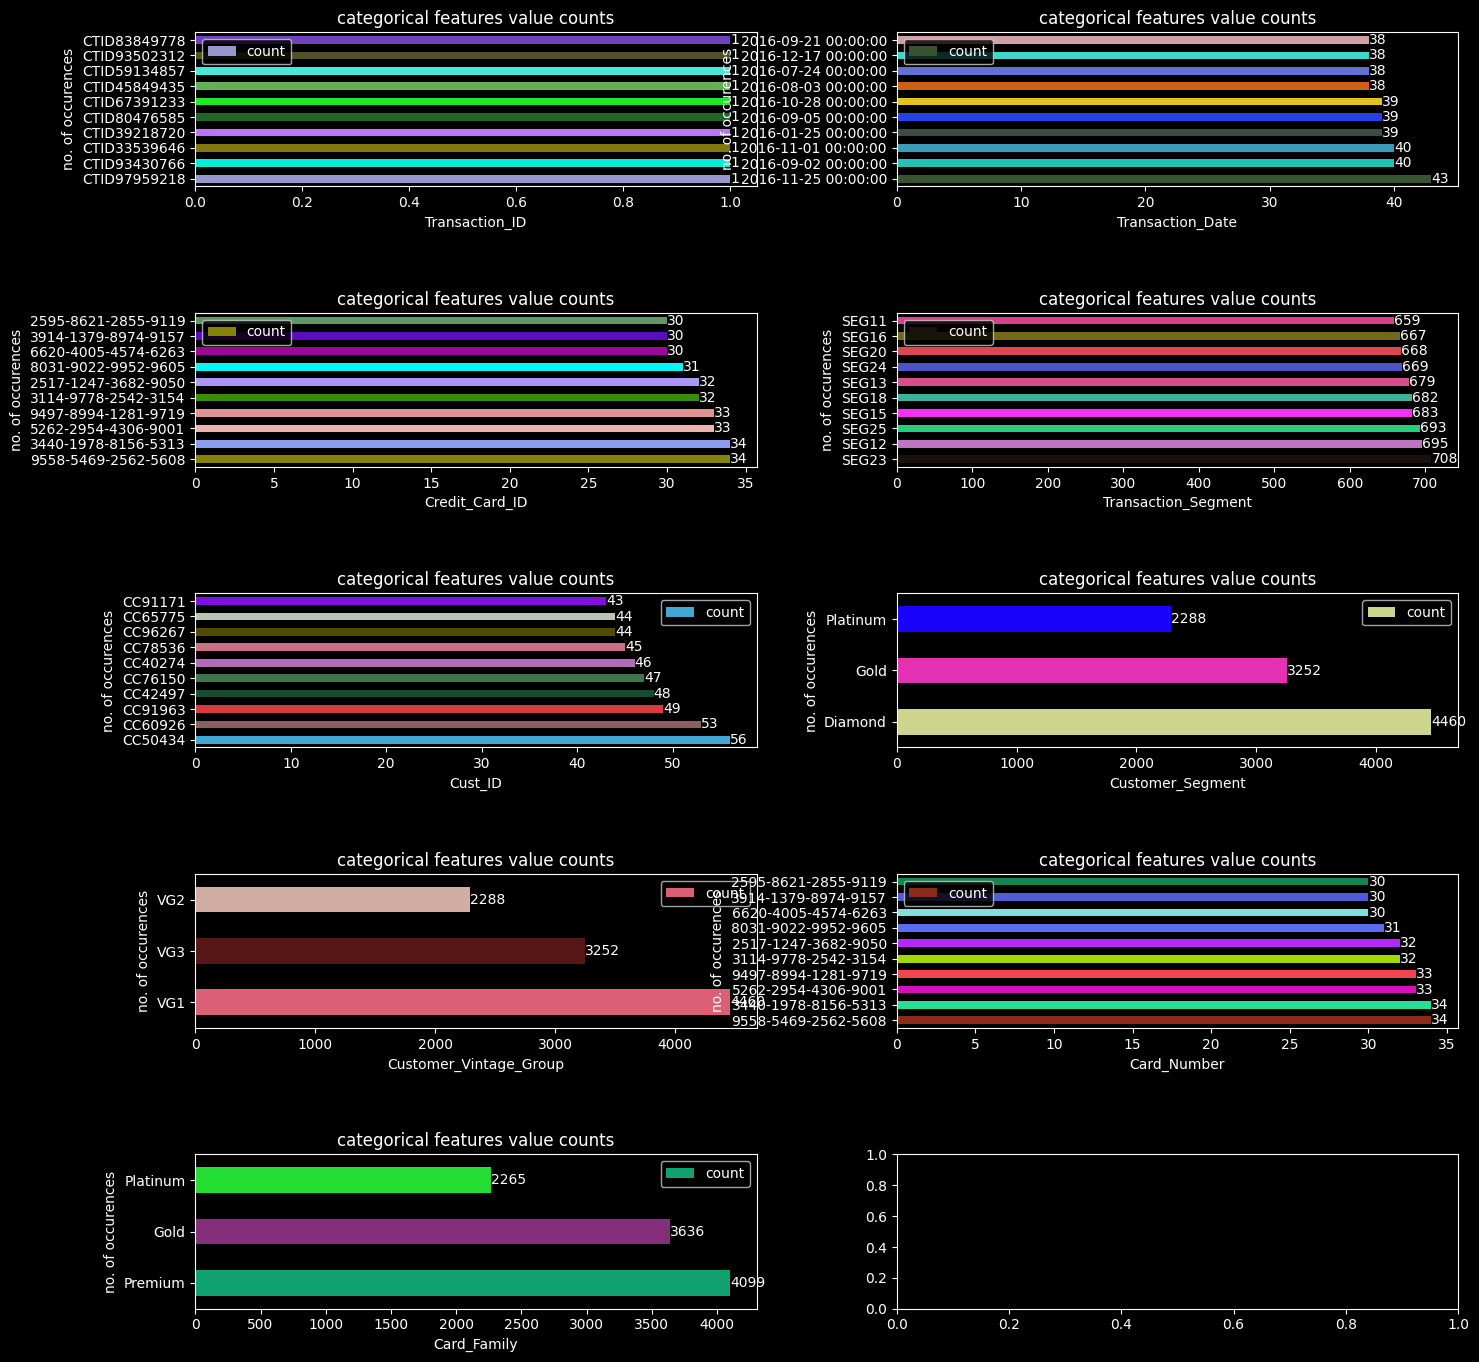

In [93]:
disp_cat_feat(final, cat_cols, fig_dims=(5, 2), img_title="categorical features value counts")

#### Boxplot to see the outliers


49.0



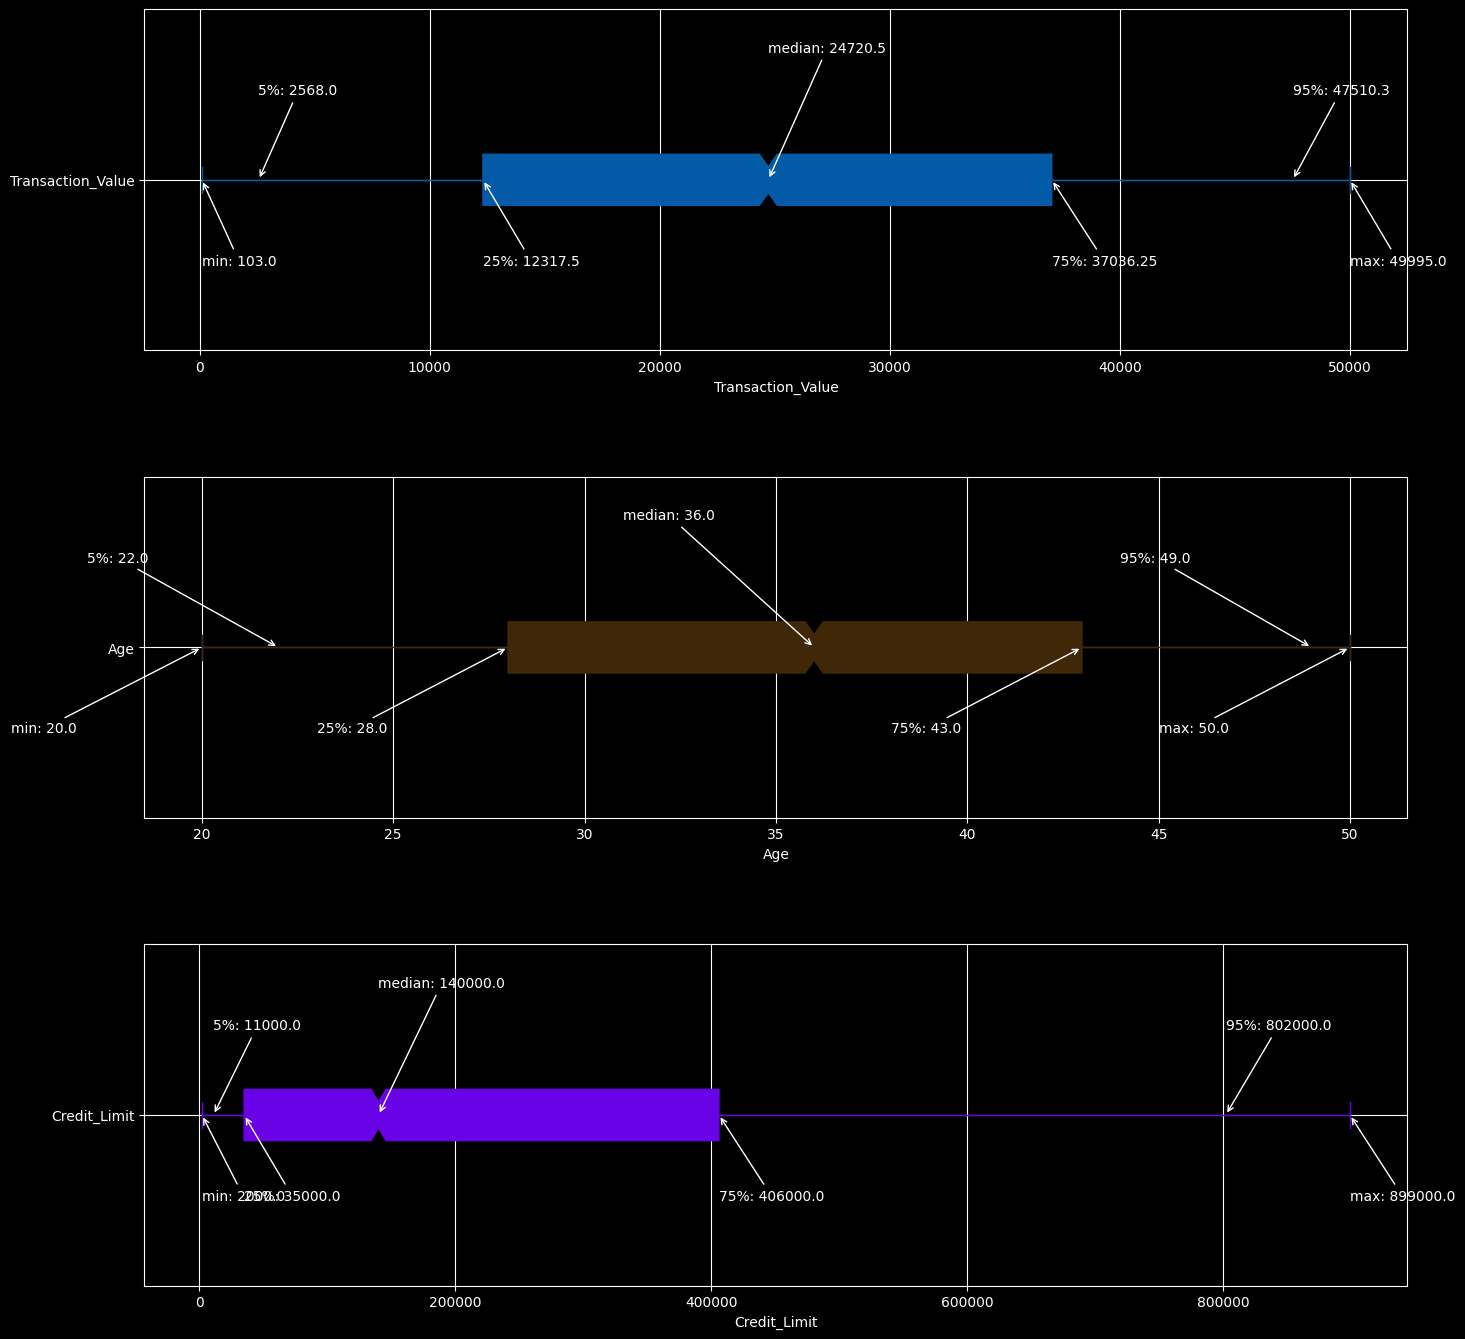

In [94]:
view_feat_outliers(final, num_cols, fig_dims=(len(num_cols), 1), img_title="numerical features outliers", style="dark")

#### histogram

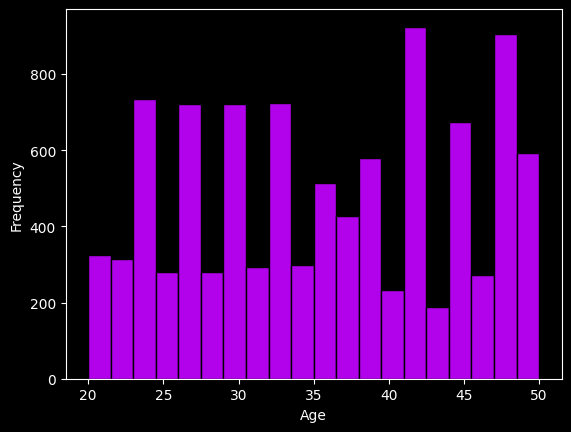

In [95]:
age_hist_axis = final["Age"].plot(kind="hist", edgecolor="black", bins=20, color="#b102eb", xlabel="Age")

#### kernel density plot

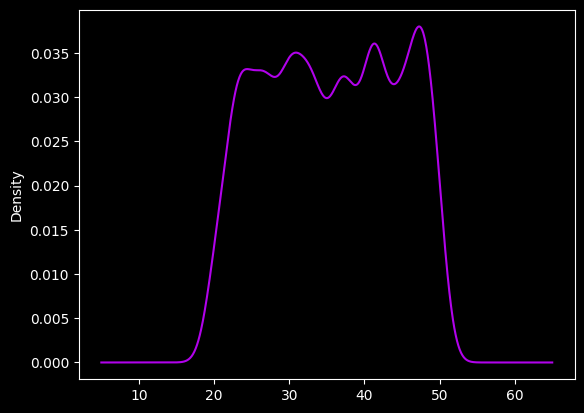

In [96]:
age_hist_axis = final["Age"].plot(kind="kde", color="#b102eb", xlabel="Age")

# Multivariate Analysis

#### scatterplot

#### heatmap

#### pairplot

#### pearson correlation

In [97]:
from sklearn.preprocessing import OrdinalEncoder

In [98]:
oe = OrdinalEncoder()
final[cat_cols] = oe.fit_transform(final[cat_cols])

In [99]:
final

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
0,2015.0,114.0,26.0,23649,14.0,0.0,78.0,23,1.0,2.0,26.0,1.0,194000.0
1,3848.0,41.0,130.0,26726,5.0,0.0,283.0,48,1.0,2.0,130.0,0.0,15000.0
2,4027.0,305.0,259.0,22012,3.0,0.0,479.0,23,0.0,0.0,259.0,0.0,2000.0
3,1627.0,27.0,268.0,37637,6.0,0.0,20.0,44,2.0,1.0,268.0,0.0,19000.0
4,6208.0,76.0,41.0,5113,3.0,0.0,1.0,42,1.0,2.0,41.0,2.0,417000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1554.0,161.0,458.0,44280,7.0,0.0,265.0,39,2.0,1.0,458.0,2.0,656000.0
9996,3673.0,143.0,351.0,27163,1.0,0.0,270.0,39,0.0,0.0,351.0,0.0,12000.0
9997,5092.0,218.0,315.0,36424,2.0,0.0,392.0,38,1.0,2.0,315.0,0.0,34000.0
9998,8648.0,283.0,407.0,8464,3.0,0.0,376.0,25,2.0,1.0,407.0,1.0,129000.0


In [100]:
decoded = pd.DataFrame(oe.inverse_transform(final[cat_cols]), columns=cat_cols)
decoded

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Segment,Cust_ID,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family
0,CTID28830551,1461456000000000000,1629-9566-3285-2123,SEG25,CC24544,Gold,VG3,1629-9566-3285-2123,Platinum
1,CTID45504917,1455148800000000000,3697-6001-4909-5350,SEG16,CC62261,Gold,VG3,3697-6001-4909-5350,Gold
2,CTID47312290,1477958400000000000,5864-4475-3659-1440,SEG14,CC99402,Diamond,VG1,5864-4475-3659-1440,Gold
3,CTID25637718,1453939200000000000,5991-4421-8476-3804,SEG17,CC14871,Platinum,VG2,5991-4421-8476-3804,Gold
4,CTID66743960,1458172800000000000,1893-8853-9900-8478,SEG14,CC11165,Gold,VG3,1893-8853-9900-8478,Premium
...,...,...,...,...,...,...,...,...,...
9995,CTID25037573,1465516800000000000,9157-2802-8374-1145,SEG18,CC59562,Platinum,VG2,9157-2802-8374-1145,Premium
9996,CTID43832298,1463961600000000000,7416-4529-6690-5703,SEG12,CC60164,Diamond,VG1,7416-4529-6690-5703,Gold
9997,CTID56532072,1470441600000000000,6699-2639-4522-6219,SEG13,CC85028,Gold,VG3,6699-2639-4522-6219,Gold
9998,CTID88101446,1476057600000000000,8341-5263-4582-7396,SEG14,CC81000,Platinum,VG2,8341-5263-4582-7396,Platinum


In [101]:
decoded["Transaction_Date"].dtype

dtype('O')

In [110]:
pd.to_datetime(decoded["Transaction_Date"])

0      2016-04-24
1      2016-02-11
2      2016-11-01
3      2016-01-28
4      2016-03-17
          ...    
9995   2016-06-10
9996   2016-05-23
9997   2016-08-06
9998   2016-10-10
9999   2016-06-18
Name: Transaction_Date, Length: 10000, dtype: datetime64[ns]

In [105]:
# revert timestamp column to datetime
decoded["Transaction_Date"] = decoded["Transaction_Date"].apply(lambda timestamp: pd.to_datetime(timestamp))
decoded

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Segment,Cust_ID,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family
0,CTID28830551,2016-04-24,1629-9566-3285-2123,SEG25,CC24544,Gold,VG3,1629-9566-3285-2123,Platinum
1,CTID45504917,2016-02-11,3697-6001-4909-5350,SEG16,CC62261,Gold,VG3,3697-6001-4909-5350,Gold
2,CTID47312290,2016-11-01,5864-4475-3659-1440,SEG14,CC99402,Diamond,VG1,5864-4475-3659-1440,Gold
3,CTID25637718,2016-01-28,5991-4421-8476-3804,SEG17,CC14871,Platinum,VG2,5991-4421-8476-3804,Gold
4,CTID66743960,2016-03-17,1893-8853-9900-8478,SEG14,CC11165,Gold,VG3,1893-8853-9900-8478,Premium
...,...,...,...,...,...,...,...,...,...
9995,CTID25037573,2016-06-10,9157-2802-8374-1145,SEG18,CC59562,Platinum,VG2,9157-2802-8374-1145,Premium
9996,CTID43832298,2016-05-23,7416-4529-6690-5703,SEG12,CC60164,Diamond,VG1,7416-4529-6690-5703,Gold
9997,CTID56532072,2016-08-06,6699-2639-4522-6219,SEG13,CC85028,Gold,VG3,6699-2639-4522-6219,Gold
9998,CTID88101446,2016-10-10,8341-5263-4582-7396,SEG14,CC81000,Platinum,VG2,8341-5263-4582-7396,Platinum


#### here we check which features are the most correlated. Usually these will be closer to 1 and away from 0
<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>
<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


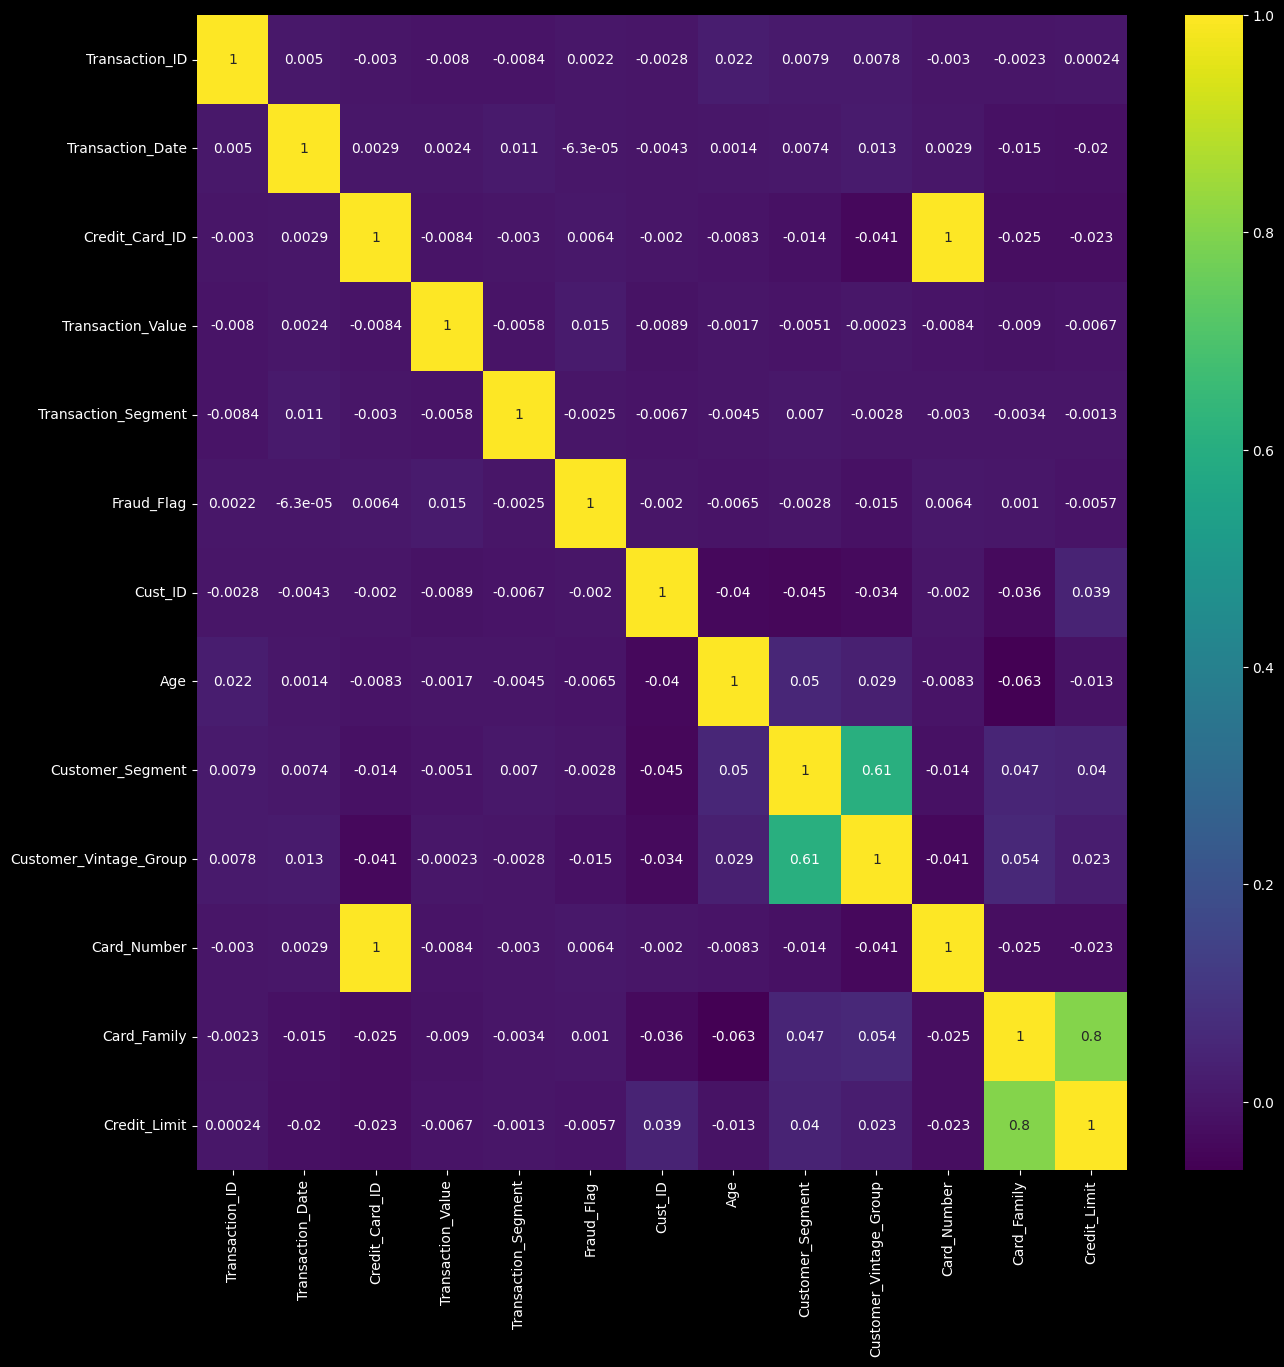

,Transaction_ID,Transaction_Date,Credit_Card_ID,Transaction_Value,Transaction_Segment,Fraud_Flag,Cust_ID,Age,Customer_Segment,Customer_Vintage_Group,Card_Number,Card_Family,Credit_Limit
Transaction_ID,1.000000,0.004973,-0.003019,-0.008044,-0.008381,0.002172,-0.002795,0.021662,0.007927,0.007757,-0.003019,-0.002265,0.000236
Transaction_Date,0.004973,1.000000,0.002938,0.002355,0.011066,-0.000063,-0.004302,0.001385,0.007382,0.013039,0.002938,-0.015442,-0.020449
Credit_Card_ID,-0.003019,0.002938,1.000000,-0.008352,-0.003043,0.006377,-0.001968,-0.008344,-0.014090,-0.041499,1.000000,-0.024573,-0.023288
Transaction_Value,-0.008044,0.002355,-0.008352,1.000000,-0.005766,0.014976,-0.008912,-0.001739,-0.005057,-0.000227,-0.008352,-0.008995,-0.006661
Transaction_Segment,-0.008381,0.011066,-0.003043,-0.005766,1.000000,-0.002513,-0.006735,-0.004522,0.006961,-0.002813,-0.003043,-0.003399,-0.001269
Fraud_Flag,0.002172,-0.000063,0.006377,0.014976,-0.002513,1.000000,-0.002031,-0.006525,-0.002827,-0.015316,0.006377,0.001045,-0.005704
Cust_ID,-0.002795,-0.004302,-0.001968,-0.008912,-0.006735,-0.002031,1.000000,-0.039741,-0.045428,-0.034242,-0.001968,-0.036003,0.038858
Age,0.021662,0.001385,-0.008344,-0.001739,-0.004522,-0.006525,-0.039741,1.000000,0.050190,0.029391,-0.008344,-0.062871,-0.012878
Customer_Segment,0.007927,0.007382,-0.014090,-0.005057,0.006961,-0.002827,-0.045428,0.050190,1.000000,0.609142,-0.014090,0.046647,0.040382
Customer_Vintage_Group,0.007757,0.013039,-0.041499,-0.000227,-0.002813,-0.015316,-0.034242,0.029391,0.609142,1.000000,-0.041499,0.053529,0.023470


In [106]:
corr_matrix = final.corr()
fig = plt.figure(figsize=(15, 15))
corr_matrix_axis = fig.add_subplot()
sb.heatmap(corr_matrix, annot=True, ax=corr_matrix_axis, cmap="viridis")
plt.show()
corr_matrix

In [107]:
cutoff = 0.5
pos_corrs = (corr_matrix < 1) & (corr_matrix >= cutoff)
non_zeros = corr_matrix.where(pos_corrs)
non_zeros_stack = non_zeros.stack()
non_zeros_stack_indeces = non_zeros_stack.index

In [108]:
non_zeros_stack

Customer_Segment        Customer_Vintage_Group    0.609142
Customer_Vintage_Group  Customer_Segment          0.609142
Card_Family             Credit_Limit              0.802254
Credit_Limit            Card_Family               0.802254
dtype: float64

In [109]:
non_zeros_stack_indeces

MultiIndex([(      'Customer_Segment', 'Customer_Vintage_Group'),
            ('Customer_Vintage_Group',       'Customer_Segment'),
            (           'Card_Family',           'Credit_Limit'),
            (          'Credit_Limit',            'Card_Family')],
           )

#### p-test